In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# Import ML ready data. 
data = pd.read_csv('joined_model_ready_match_data.csv')
data.head()

,goals,shots,pass_attempts,pass_percent,tackle_attempts,tackle_percent,red_cards,players_in_match,forwards,midfielders,...,division,goals_per_match,goals_conceded_per_match,rel_div,win_percent,recent_win_average,rel_gpm,rel_gcpm,games_played,result
0,1,6,125,0.76,49,0.37,0,8,2,3,...,1.0,2.63,0.75,0.0,0.770588,2.0,-0.24,-0.57,510.0,0
1,5,13,120,0.77,29,0.45,0,8,2,3,...,1.0,2.63,0.75,0.0,0.770588,2.0,0.08,-1.56,510.0,1
2,1,7,124,0.80,65,0.26,0,10,2,4,...,1.0,2.63,0.75,-1.0,0.770588,2.0,0.24,-0.96,510.0,0
3,1,11,195,0.79,41,0.39,0,11,2,4,...,1.0,2.63,0.75,0.0,0.770588,2.0,0.74,-1.32,510.0,0
4,3,13,145,0.81,43,0.23,0,10,2,4,...,1.0,2.63,0.75,-1.0,0.770588,2.0,0.32,-1.30,510.0,1


In [3]:
# Split the Data into X, Y
X = data.drop("result", axis=1)
y = data.result

In [4]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Generate the Model
classifier = RandomForestClassifier(n_estimators=750, criterion ='entropy', random_state = 1)

In [7]:
# Train the model
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=750, random_state=1)

In [8]:
# Predict the test data
y_pred = classifier.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8160 1434]
 [1543 5155]]


In [10]:
# Output Accuracy score
accuracy_score(y_test, y_pred)

0.8172722808740486

In [11]:
# Print Classifcation report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      9594
           1       0.78      0.77      0.78      6698

    accuracy                           0.82     16292
   macro avg       0.81      0.81      0.81     16292
weighted avg       0.82      0.82      0.82     16292



In [12]:
# Generate the Feature importance
classifier.feature_importances_

array([0.26785446, 0.06278951, 0.05541761, 0.04011923, 0.04162676,
       0.04240264, 0.00359896, 0.02025264, 0.01467663, 0.01833587,
       0.00788606, 0.00333835, 0.00448602, 0.01796509, 0.04624818,
       0.04633622, 0.04928595, 0.04746007, 0.06000053, 0.05336876,
       0.0515279 , 0.04502256])

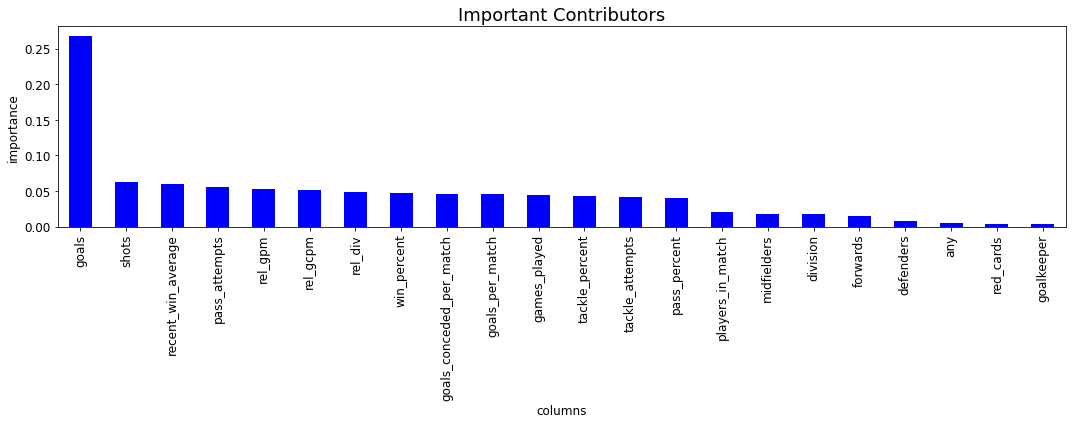

In [13]:
# Generate bar graph of feature importance. 
importance = classifier.feature_importances_
columns = X_train.columns
combined_features = pd.Series(importance, columns)

# sort the combined_features series in descending order
combined_features_sorted = combined_features.sort_values(ascending=False)

# plot the sorted series
pandas_plot = combined_features_sorted.plot.bar(figsize=(15,6), color='b', fontsize = 12)
plt.xlabel("columns", fontsize = 12)
# plt.xticks(rotation = 45)
plt.ylabel("importance", fontsize = 12)
plt.title("Important Contributors", fontsize = 18)
plt.tight_layout()
plt.show()

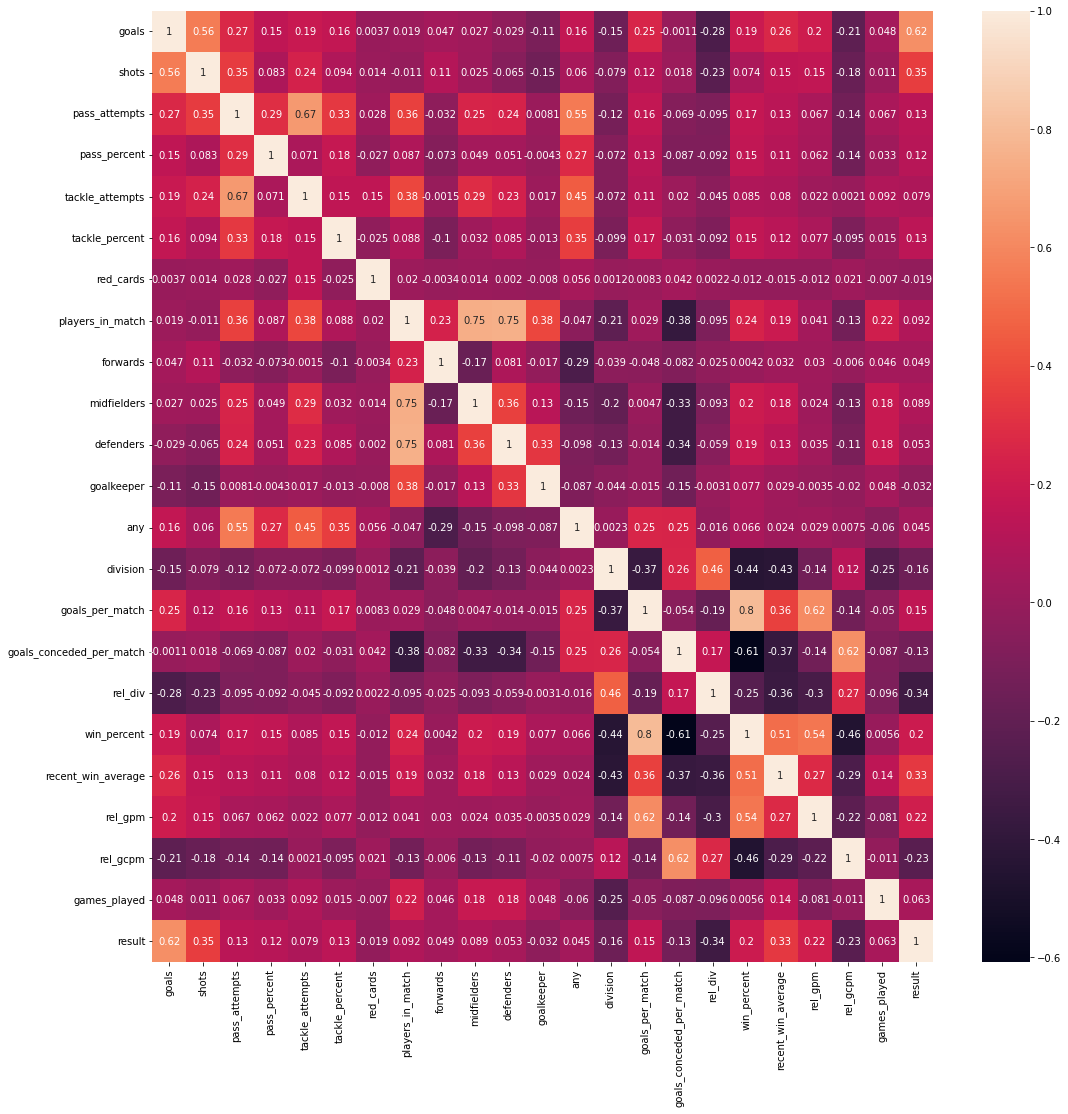

In [14]:

import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = data.corr()
plt.figure(figsize=(17.5, 17.5)) # Increase the size to 10x10 inches
sn.heatmap(corr_matrix, annot=True)
plt.show()